In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import json
import os
import unicodedata

In [33]:
#combine data

#folder file list
path = "/content/drive/MyDrive/Colab Notebooks/선거/0202_data"
file_lst = os.listdir(path)

lst_yoon = list()
lst_lee = list()
lst_ahn = list()
DATE = list()

for file in file_lst:
  file = unicodedata.normalize('NFC', file)
  candidate_name = file[-7:-4]
  date = file[:4]
  
  if candidate_name == '윤석열':
    lst_yoon.append(file)
    DATE.append(date)
  elif candidate_name == '이재명':
    lst_lee.append(file)
  elif candidate_name == '안철수':
    lst_ahn.append(file)

lst_yoon.sort()
lst_lee.sort()
lst_ahn.sort()
DATE.sort()

# 가중치 구하기

In [55]:
#data analysis
def to_dataframe(candidate):
  if candidate == '윤석열':
    #lst_yoon 은 ['0220윤석열.tsv','0221윤석열.tsv',...]
    target = lst_yoon
  elif candidate == '이재명':
    target = lst_lee
  elif candidate == '안철수':
    target = lst_ahn

  PATH = '/content/drive/MyDrive/Colab Notebooks/선거/0202_data'

  timepoint = ["0111","0118", "0128", "0210", "0215", "0220", "0225", "0302"]

  viewcount_pos = list()
  likecount_pos = list()
  commentcount_pos = list()
  viewcount_neg = list()
  likecount_neg = list()
  commentcount_neg = list()
  #cnt는 timepoint 사이 간격 계산해서 평균내주기 위함.
  vc_pos, vc_neg, lc_pos, lc_neg, cc_pos, cc_neg, cnt = 0, 0, 0, 0, 0, 0, 0

  for index, file_name in enumerate(target):
    result = pd.read_csv(os.path.join(PATH, file_name), sep = '\t')
    df = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/선거/old', file_name), delimiter= '\t')
    date = str(file_name[:4])

    if date == "0303":
      break

    #df는 매일 데이터 라벨까지 합친것 
    df['label'] = result['label']
    df['label'] = df['label'].apply(lambda x: x if x==1 else -1)
    label_counts = df['label'].value_counts()[1]

    #50개 모두에 대해 label 따로 나눠서 평균내줌
    df['viewcount_pos'] = df[df['label'] == 1]['viewcount']
    df['viewcount_neg'] = df[df['label'] == -1]['viewcount']
    df['likecount_pos'] = df[df['label'] == 1]['likecount']
    df['likecount_neg'] = df[df['label'] == -1]['likecount']
    df['commentcount_pos'] = df[df['label'] == 1]['commentcount']
    df['commentcount_neg'] = df[df['label'] == -1]['commentcount']

    #매일 자료의 평균값. 
    vc_pos += df['viewcount_pos'].mean(skipna=True)
    vc_neg += df['viewcount_neg'].mean(skipna=True)
    lc_pos += df['likecount_pos'].mean(skipna=True)
    lc_neg += df['likecount_neg'].mean(skipna=True)
    cc_pos += df['commentcount_pos'].mean(skipna=True)
    cc_neg += df['commentcount_neg'].mean(skipna=True)
    cnt += 1

    if date in timepoint:
      viewcount_pos.append(vc_pos/cnt)
      likecount_pos.append(lc_pos/cnt)
      commentcount_pos.append(cc_pos/cnt)
      viewcount_neg.append(vc_neg/cnt)
      likecount_neg.append(lc_neg/cnt)
      commentcount_neg.append(cc_neg/cnt)
      vc_pos, vc_neg, lc_pos, lc_neg, cc_pos, cc_neg, cnt = 0, 0, 0, 0, 0, 0, 0

  ret_dataframe = pd.DataFrame([viewcount_pos, viewcount_neg, likecount_pos, likecount_neg, commentcount_pos, commentcount_neg], index = ['viewcount_pos', 'viewcount_neg', 'likecount_pos', 'likecount_neg', 'commentcount_pos', 'commentcount_neg'])
  ret_dataframe = ret_dataframe.T

  return ret_dataframe
  

 

In [56]:
ret_lee = to_dataframe('이재명')
ret_yoon = to_dataframe('윤석열')
ret_ahn = to_dataframe('안철수')
print(ret_lee)
print(ret_yoon)
print(ret_ahn)

   viewcount_pos  viewcount_neg  likecount_pos  likecount_neg  \
0    3044.152381   14654.733333     548.292857    2643.270833   
1    3293.657214   17171.667901     601.434982    1891.865123   
2    3843.569090    6754.255969     641.984244    1497.653421   
3    4443.027939    6529.458991     782.146935    1743.368889   
4    7964.806739   14372.055152    1300.406619    1229.250530   
5    6091.371848    7943.799242    1042.217751    1970.985606   
6    6408.092655   12810.962334    1225.495935    3348.830547   
7    9511.412944    9656.317356    1195.208527    2002.564862   

   commentcount_pos  commentcount_neg  
0         40.333333        124.225000  
1         26.393762        230.973677  
2         34.485074         83.315887  
3         41.479551         92.167845  
4         71.435084         84.442348  
5         47.579751         78.564394  
6         55.129832        144.740523  
7         45.812461        128.492080  
   viewcount_pos  viewcount_neg  likecount_pos  likeco

In [57]:
ret_lee['label'] = [37,34,35,37,34,38,37.2,38]
ret_yoon['label'] = [31,33,35,38,41,37,42.3,39]
ret_ahn['label'] = [17,17,15,13,11,12,12,12]

ret_concat = pd.concat([ret_lee, ret_yoon, ret_ahn])
ret_concat.reset_index(drop=True)

,viewcount_pos,viewcount_neg,likecount_pos,likecount_neg,commentcount_pos,commentcount_neg,label
0,3044.152381,14654.733333,548.292857,2643.270833,40.333333,124.225000,37.0
1,3293.657214,17171.667901,601.434982,1891.865123,26.393762,230.973677,34.0
2,3843.569090,6754.255969,641.984244,1497.653421,34.485074,83.315887,35.0
3,4443.027939,6529.458991,782.146935,1743.368889,41.479551,92.167845,37.0
4,7964.806739,14372.055152,1300.406619,1229.250530,71.435084,84.442348,34.0
5,6091.371848,7943.799242,1042.217751,1970.985606,47.579751,78.564394,38.0
6,6408.092655,12810.962334,1225.495935,3348.830547,55.129832,144.740523,37.2
7,9511.412944,9656.317356,1195.208527,2002.564862,45.812461,128.492080,38.0
8,4089.003268,15052.138393,468.777778,2427.950893,51.199346,127.370536,31.0
9,6590.446338,5867.616475,854.966456,1564.515580,41.304938,85.557289,33.0


# 선형회귀로 가중치 구함

In [58]:
from sklearn.model_selection import train_test_split

x = ret_concat[['viewcount_pos', 'viewcount_neg', 'likecount_pos', 'likecount_neg', 'commentcount_pos', 'commentcount_neg']]
y = ret_concat['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()    #model 생성
model.fit(X = x_train, y =  y_train)

print(model.score(x_train, y_train))

0.6439387997647591


In [60]:
print(model.coef_)

[-0.00245329 -0.00057106  0.01326757  0.00423786  0.14805592  0.07354978]


In [ ]:
#equation
#linear regression

[1/11, 1/18, 1/28, 2/10, 2/15, 2/20, 2/25, 3/2]
#gallup 이재명
[37,34,35,37,34,38,37.2,38]

#윤석열
[31,33,35,38,41,37,42.3,39]

#안철수
[17,17,15,13,11,12,12,12]

# 시각화 (단순히 라벨 1/-1로 레이블링)

In [81]:

def combine_to_dataframe(candidate):
  if candidate == '윤석열':
    target = lst_yoon
  elif candidate == '이재명':
    target = lst_lee
  elif candidate == '안철수':
    target = lst_ahn

  ret_score_list = list()
  upper_boundary = list()
  lower_boundary = list()
  PATH = '/content/drive/MyDrive/Colab Notebooks/선거/0202_data'
  
  for file_name in target:
    result = pd.read_csv(os.path.join(PATH, file_name), sep = '\t')
    df = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/선거/old', file_name), delimiter= '\t')
    
    #df는 매일 데이터 라벨까지 합친것 
    df['label'] = result['label']
    df['label'] = df['label'].apply(lambda x: x if x==1 else -0.33)
    
    score = define_score(df)
    ret_score_list.append(score)
 
    #ratio 구함
    ratio = df['label'].value_counts()[1] / 50
    #confidence interval boundary
    margin = 1.96 * math.sqrt(ratio * (1-ratio) / 50) * 10
    upper = score + score * margin
    lower = score - score * margin 
    upper_boundary.append(upper)
    lower_boundary.append(lower)

  return ret_score_list, upper_boundary, lower_boundary
  
  

In [80]:
def define_score(df):
  df['score'] = ((df['viewcount'] * -0.00245329 + df['likecount'] * 0.01326757 + df['commentcount'] * 0.14805592)) * df['label']
  score = df["score"].mean()
  
  return score
# -0.00245329 0.01326757 0.14805592

In [82]:
#combine electra result and original data
#calculate score

scored_list_lee, upper_bound_lee, lower_bound_lee = combine_to_dataframe('이재명')
scored_list_yoon, upper_bound_yoon, lower_bound_yoon = combine_to_dataframe('윤석열')
scored_list_ahn, upper_bound_ahn, lower_bound_ahn = combine_to_dataframe('안철수')

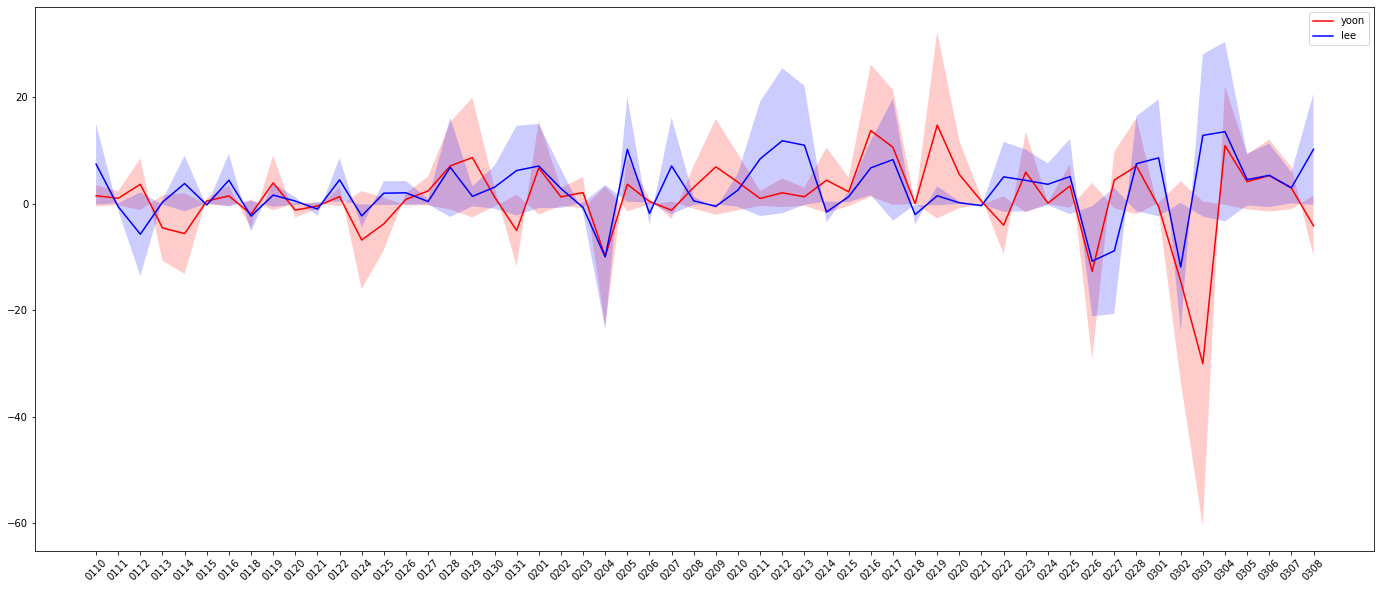

In [83]:
#visualization
from matplotlib.dates import MonthLocator, DateFormatter

#date = pd.date_range(start='2022-01-10', end='2022-02-02', freq='D')
#date_labels = [str(d)[5:10] for d in date]
date_labels = DATE

x = np.arange(len(scored_list_lee))

fig, ax = plt.subplots(figsize=(24, 10))

ax.plot(scored_list_yoon, label='yoon', color='red')
ax.plot(scored_list_lee, label='lee', color='blue')
#ax.plot(scored_list_ahn, label='ahn', color='orange')

ax.fill_between(x, upper_bound_yoon, lower_bound_yoon, facecolor='red', interpolate=True, alpha = 0.2)
ax.fill_between(x, upper_bound_lee, lower_bound_lee, facecolor='blue', interpolate=True, alpha = 0.2)
#ax.fill_between(x, upper_bound_ahn, lower_bound_ahn, facecolor='orange', interpolate=True, alpha=0.2)

plt.xticks(ticks=x, labels=date_labels, rotation=45)


plt.legend()
plt.show()

# 시각화 (다중선형회귀)